# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

How many rows and columns are in our data?

In [4]:
sensor.shape
#1751 rows × 12 columns

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [5]:
new_index = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=sensor.shape[0])
sensor.index = pd.DatetimeIndex(new_index,freq="infer")
#sensor.index = pd.infer_freq(sensor.index) otra forma de hacer lo mismo que no sabemos si funciona(repasar)
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Assign the time series index to the dataframe's index.

In [6]:
#done

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

Figure(432x288)


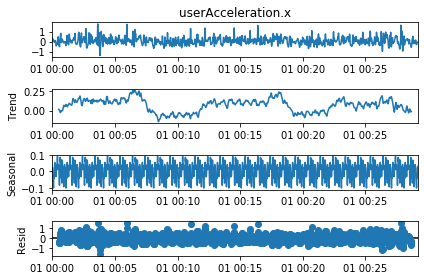

In [7]:
import statsmodels.api as sm
desc = sm.tsa.seasonal_decompose(sensor["userAcceleration.x"],period=60) #pongo period, porque freq está despreciado
print(desc.plot())

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

Figure(432x288)


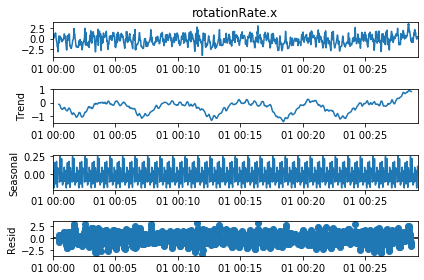

In [8]:
desc2 = sm.tsa.seasonal_decompose(sensor["rotationRate.x"],period=60) 
print(desc2.plot())

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

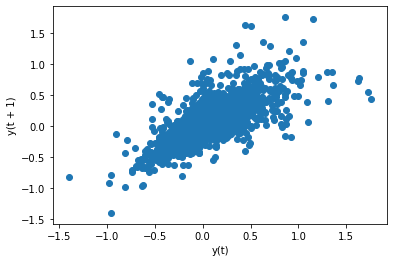

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
pd.plotting.lag_plot(sensor["userAcceleration.x"])

Create a lag plot for `rotationRate.x`

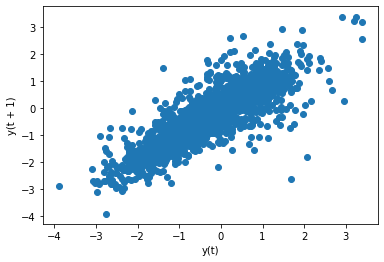

In [10]:
plt.figure()
pd.plotting.lag_plot(sensor["rotationRate.x"])

What are your conclusions from both visualizations?

Parece que existe una tendencia lineal ascendente en los datos.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [11]:
from statsmodels.tsa.stattools import adfuller
stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"

In [12]:
print(sensor["rotationRate.x"],stationaryCheck(sensor["rotationRate.x"]))
print(sensor["userAcceleration.x"],stationaryCheck(sensor["userAcceleration.x"]))

2018-01-01 00:00:00    0.316738
2018-01-01 00:00:01    0.842032
2018-01-01 00:00:02   -0.138143
2018-01-01 00:00:03   -0.025005
2018-01-01 00:00:04    0.114253
                         ...   
2018-01-01 00:29:06   -0.123211
2018-01-01 00:29:07   -0.057641
2018-01-01 00:29:08    0.343238
2018-01-01 00:29:09    0.470144
2018-01-01 00:29:10    0.291873
Freq: S, Name: rotationRate.x, Length: 1751, dtype: float64 Stationary
2018-01-01 00:00:00    0.294894
2018-01-01 00:00:01    0.219405
2018-01-01 00:00:02    0.010714
2018-01-01 00:00:03   -0.008389
2018-01-01 00:00:04    0.199441
                         ...   
2018-01-01 00:29:06   -0.268367
2018-01-01 00:29:07   -0.102444
2018-01-01 00:29:08   -0.085590
2018-01-01 00:29:09   -0.048105
2018-01-01 00:29:10   -0.065011
Freq: S, Name: userAcceleration.x, Length: 1751, dtype: float64 Stationary


What are your conclusions from this test?

Se rechaza la hipótesis nula. Lo que significa que es estacionario. No tiene una estructura dependiente del tiempo.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [13]:
train = sensor["userAcceleration.x"].iloc[:-10]
test = sensor["userAcceleration.x"].iloc[-10:]

In [14]:
from statsmodels.tsa.arima_model import ARMA

In [15]:
model = ARMA(train, order=(2, 1))
model_fit = model.fit(disp=False)
predictions_ARMA = model_fit.predict(len(train), len(train)+len(test)-1)
predictions_ARMA

2018-01-01 00:29:01    0.173149
2018-01-01 00:29:02    0.142896
2018-01-01 00:29:03    0.100522
2018-01-01 00:29:04    0.070106
2018-01-01 00:29:05    0.056099
2018-01-01 00:29:06    0.053778
2018-01-01 00:29:07    0.056790
2018-01-01 00:29:08    0.060646
2018-01-01 00:29:09    0.063316
2018-01-01 00:29:10    0.064493
Freq: S, dtype: float64

In [16]:
prueba = pd.DataFrame({
    "Pred_futuro": predictions_ARMA ,
    "Test": test,
})
prueba

,Pred_futuro,Test
2018-01-01 00:29:01,0.173149,0.149749
2018-01-01 00:29:02,0.142896,0.038461
2018-01-01 00:29:03,0.100522,-0.169175
2018-01-01 00:29:04,0.070106,-0.300361
2018-01-01 00:29:05,0.056099,-0.270174
2018-01-01 00:29:06,0.053778,-0.268367
2018-01-01 00:29:07,0.056790,-0.102444
2018-01-01 00:29:08,0.060646,-0.085590
2018-01-01 00:29:09,0.063316,-0.048105
2018-01-01 00:29:10,0.064493,-0.065011


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [17]:
from statsmodels.tools.eval_measures import rmse

In [18]:
rmse = rmse(prueba["Pred_futuro"],prueba["Test"])

In [19]:
rmse

0.22529863455816979

# Autobonus 

Intentamos reprocesar los datos aplicando filtro paso bajo a la señal para ver qué pasa y aprender un poco más.

In [20]:
ac = sensor["userAcceleration.x"]

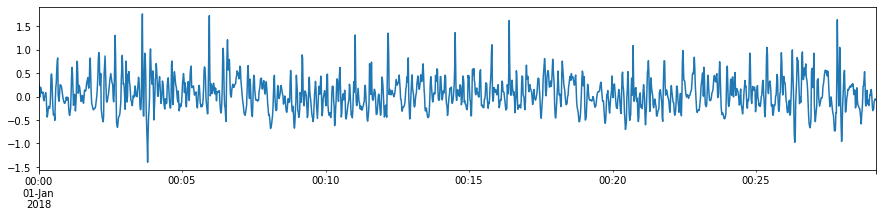

In [21]:
ac.plot(figsize=(15,3));

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


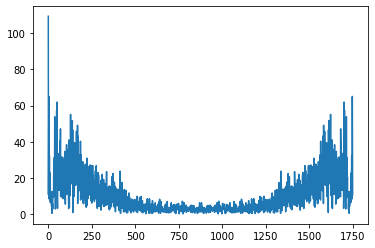

In [22]:
from scipy.fftpack import fft
mod = np.abs(fft(ac))
plt.plot(mod)

In [23]:
from scipy import signal

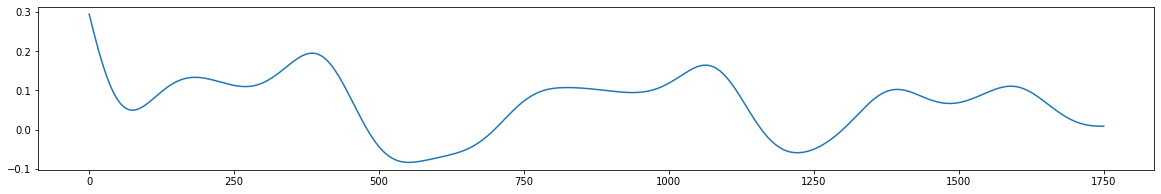

In [65]:
b,a = signal.butter(3, 1/100)
data_filtered = signal.filtfilt(b,a,ac)

plt.figure(figsize=(20,3))
plt.plot(data_filtered)

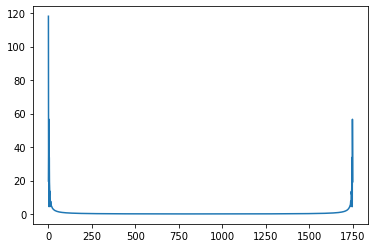

In [53]:
modf = np.abs(fft(data_filtered))
plt.plot(modf)

In [54]:
data_filtered.shape

(1751,)

In [55]:
dffiltered = pd.DataFrame({
    "Filtered": data_filtered})
dffiltered

,Filtered
0,0.294220
1,0.288211
2,0.282226
3,0.276269
4,0.270343
...,...
1746,0.008300
1747,0.008276
1748,0.008257
1749,0.008241


In [56]:
train2 = dffiltered["Filtered"].iloc[:-10]
test2 = dffiltered["Filtered"].iloc[-10:]

In [59]:
model2 = ARMA(train2, order=(2, 1))
model_fit = model2.fit(disp=False)
predictions_ARMA2 = model_fit.predict(len(train2), len(train2)+len(test2)-1)
#predictions_ARMA

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.